# Cvičení ke kapitole Vizualizace

Zadání: https://kodim.cz/kurzy/python-data-1/python-pro-data-1/vizualizace/excs

## 1. Házení kostkami

Mějme dvě hrací kostky, kterými vždy hodíme najednou a zaznamenáme součet bodů. 

Stáhněte si textový soubor [kostky.csv](https://kodim.cz/czechitas/progr2-python/python-pro-data-1/vizualizace/excs/hazeni-kostkami/assets/kostky.csv), který obsahuje 1.000 takových nezávislých hodů.



Načtěte tato data do tabulky a zobrazte histogram hodů. 

Zvolte vhodné rozložení přihrádek a zodpovězte následující dotazy:

1. Jaká je nejčastější hodnota, která na dvou kostkách padne?
2. Je větší šance, že padne hodnota 12 než že padne hodnota 2?

In [117]:
import requests
import pandas
import matplotlib.pyplot as plt

r = requests.get("https://kodim.cz/cms/assets/kurzy/python-data-1/python-pro-data-1/vizualizace/excs/excs%3Ehazeni-kostkami/kostky.csv")
open("kostky.csv", "wb").write(r.content)

kostky = pandas.read_csv("kostky.csv")
kostky.head()

,hodnota
0,7
1,10
2,9
3,9
4,2


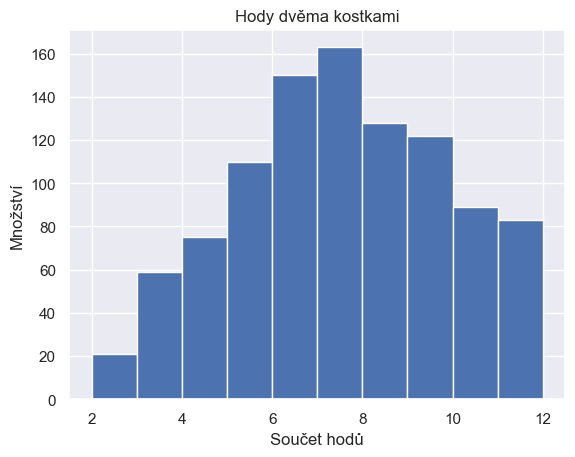

In [118]:
kostky.hist()

# Různé možnosti definování binů pro rozdělení dat
# kostky.hist(bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# kostky.hist(bins=range(2,13))
# kostky.hist(bins=3)

# Zobrazení relativní četnosti místo
# kostky.hist(bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], density=True)

# Vyšperkování grafu popisky
plt.title("Hody dvěma kostkami")
plt.xlabel("Součet hodů")
plt.ylabel("Množství")

# Zobrazení grafu - v Jupyter Notebooku není potřeba, ale v běžném editoru ano (otevře graf v novém okně)
plt.show()  

# Export grafu do souboru
# plt.savefig('my_plot.png')

## 2. Call centrum

V souboru callcentrum.txt najdete několik tisíc záznamů pro call centrum, které udávají časy mezi jednotlivými příchozími hovory v minutách a vteřinách. 

Načtěte tato data do série v Pythonu. 


In [119]:
import requests
import pandas
import matplotlib.pyplot as plt

r = requests.get("https://kodim.cz/cms/assets/kurzy/python-data-1/python-pro-data-1/vizualizace/excs/excs%3Ecall-centrum/callcentrum.csv")
open("callcentrum.csv", "wb").write(r.content)

callcentrum_raw = pandas.read_csv("callcentrum.csv")
callcentrum_raw.head()

,hodnota
0,3:14
1,1:28
2,10:02
3,4:24
4,11:17


Časy převeďte na vteřiny a zobrazte jejich histogram a boxplot. 

K převodu na vteřiny můžeš použít metodu `str.split()`. Pomocí ní rozdělíš hodnoty minut a vteřit do samostatných sloupců. 

Pomocí metody `astype(int)` převedeš hodnoty na čísla. 

Poté pomocí počítaných sloupců můžeš spočítat celkový počet vteřin.

In [120]:
callcentrum = callcentrum_raw["hodnota"].str.split(':', expand=True).astype(int)
print(callcentrum.head())

# Přepočítáme hodiny:minuty na vteřiny
callcentrum["vteriny"] = callcentrum[0] * 60 + callcentrum[1]
callcentrum.head()

    0   1
0   3  14
1   1  28
2  10   2
3   4  24
4  11  17


,0,1,vteriny
0,3,14,194
1,1,28,88
2,10,2,602
3,4,24,264
4,11,17,677


Co lze z těchto dvou grafů vyčíst?

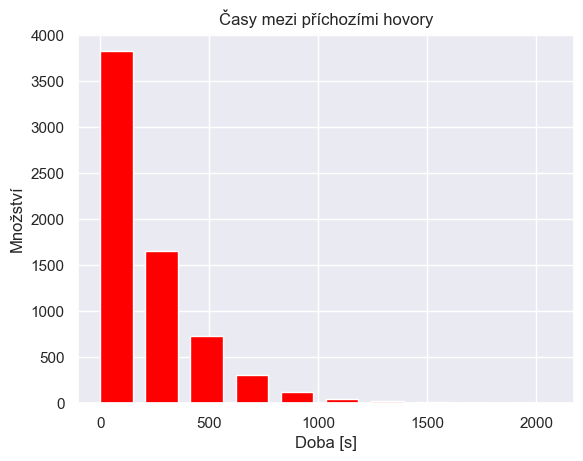

In [121]:
# Histogram
callcentrum["vteriny"].hist(color="red", width=150)
plt.title("Časy mezi příchozími hovory")
plt.xlabel("Doba [s]")
plt.ylabel("Množství")
plt.show()

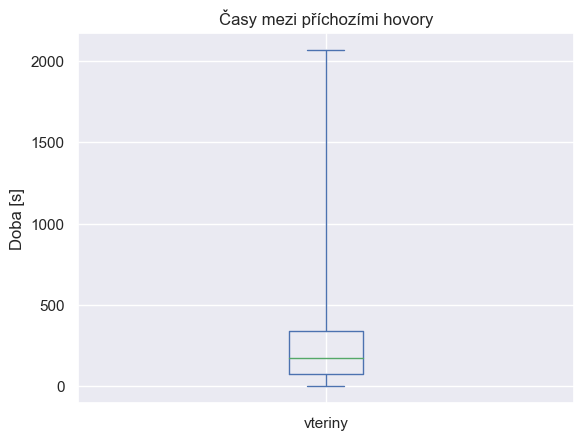

In [122]:
# Boxplot
callcentrum["vteriny"].plot(kind='box', whis=[0, 100])
# ... argument whis definuje rozsah whiskers (fousků:)) - zde percentil 0 a 100, tzn. pokrývají celý rozsah dat, takže ukazují min a max
plt.title("Časy mezi příchozími hovory")
plt.ylabel("Doba [s]")
plt.show()

## 3. Hurá na hory

Následující data obsahují úhrnné množství sněhu (v cm) napadlé za každý rok pro posledních 50 let pro dva lyžarské resorty. 

První sloupec je rok, druhý jsou data pro resort Hora šílenství, třetí jsou data pro resort Prašné údolí.

In [123]:
import pandas
import matplotlib.pyplot as plt

snih = [
    [1968, 480, 351],
    [1969, 462, 663],
    [1970, 443, 490],
    [1971, 518, 444],
    [1972, 537, 420],
    [1973, 446, 941],
    [1974, 446, 691],
    [1975, 450, 477],
    [1976, 356, 395],
    [1977, 381, 652],
    [1978, 345, 525],
    [1979, 430, 762],
    [1980, 266, 316],
    [1981, 533, 781],
    [1982, 471, 769],
    [1983, 407, 801],
    [1984, 526, 633],
    [1985, 391, 488],
    [1986, 361, 624],
    [1987, 470, 471],
    [1988, 506, 514],
    [1989, 333, 208],
    [1990, 462, 909],
    [1991, 438, 443],
    [1992, 364, 488],
    [1993, 452, 579],
    [1994, 484, 519],
    [1995, 460, 809],
    [1996, 465, 682],
    [1997, 431, 814],
    [1998, 463, 595],
    [1999, 460, 512],
    [2000, 503, 750],
    [2001, 462, 951],
    [2002, 429, 413],
    [2003, 405, 738],
    [2004, 477, 777],
    [2005, 385, 316],
    [2006, 368, 417],
    [2007, 513, 635],
    [2008, 448, 689],
    [2009, 525, 443],
    [2010, 427, 225],
    [2011, 460, 618],
    [2012, 417, 742],
    [2013, 517, 247],
    [2014, 466, 552],
    [2015, 523, 441],
    [2016, 422, 690],
    [2017, 420, 699]
]

snih = pandas.DataFrame(snih, columns=['rok', 'hora', 'udoli'])
snih = snih.set_index('rok')

Použijte krabicový graf k porovnání sněhových srážek v obou resortech. 

Do kterého byste se vypravili příští rok na lyže a proč?



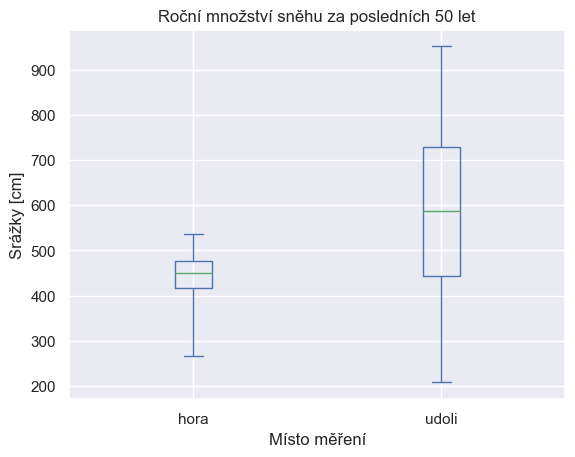

In [127]:
snih.plot(kind='box', whis=[0, 100])
plt.title("Roční množství sněhu za posledních 50 let")
plt.xlabel("Místo měření")
plt.ylabel("Srážky [cm]")
plt.show()

<AxesSubplot:ylabel='Count'>

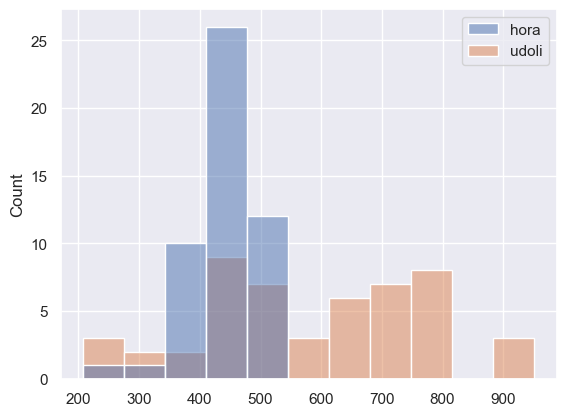

In [125]:
# Ukázka Seaborn
import seaborn as sns

# Barevné téma
# https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
sns.set_theme()
# sns.set_theme(style="whitegrid", palette="Set2")

# Vizualizace
sns.histplot(snih)